<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/CoIntegrationPairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import python libraries

In [81]:
!pip install yfinance # download and install yfinance
import pandas as pd # handle dataframe
import yfinance as yf # download data
import datetime as dt # handle datetime
import matplotlib.pyplot as plt # plot graph
import numpy as np # array

In [82]:
set100 = ["ACE", "ADVANC", "AEONTS", "AMATA", "AOT", "AP", "AWC", "BAM", "BANPU",
          "BBL", "BCH", "BCP", "BCPG", "BDMS", "BEC", "BEM", "BGRIM", "BH",
          "BLA", "BPP", "BTS", "CBG", "CENTEL", "CHG", "CK", "CKP", "COM7",
          "CPALL", "CPF", "CPN", "CRC", "DOHOME", "EA", "EGCO", "EPG",
           "GLOBAL", "GPSC", "GULF", "GUNKUL", "HANA", "HMPRO", "INTUCH",
          "IRPC", "IVL", "JMART", "JMT", "KBANK", "KCE", "KEX", "KKP", "KTB",
          "KTC", "LH", "MAJOR", "MEGA", "MINT", "MTC", "OR", "ORI", "OSP",
          "PLANB", "PTG", "PTT", "PTTEP", "PTTGC", "QH", "RATCH", "RBF",
          "RCL", "RS", "SAWAD", "SCB", "SCC", "SCGP", "SINGER", "SIRI", "SPALI",
          "SPRC", "STA", "STARK", "STEC", "STGT", "SUPER", "SYNEX", "TASCO",
          "TCAP", "THANI", "TIDLOR", "TISCO", "TOP", "TQM", "TRUE", "TTA",
          "TTB", "TU", "TVO", "VGI", "WHA"] # old set of set100

In [83]:
historical_prices = dict() # download data in 2023
for symbol in set100:
  df = yf.download(f"{symbol}.BK", start="2023-01-01", end="2024-01-01").dropna().Close
  historical_prices[symbol] = (df, len(df))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Plot Normalized Prices

Text(0.5, 1.0, 'Normalized Price SET100 in 2023')

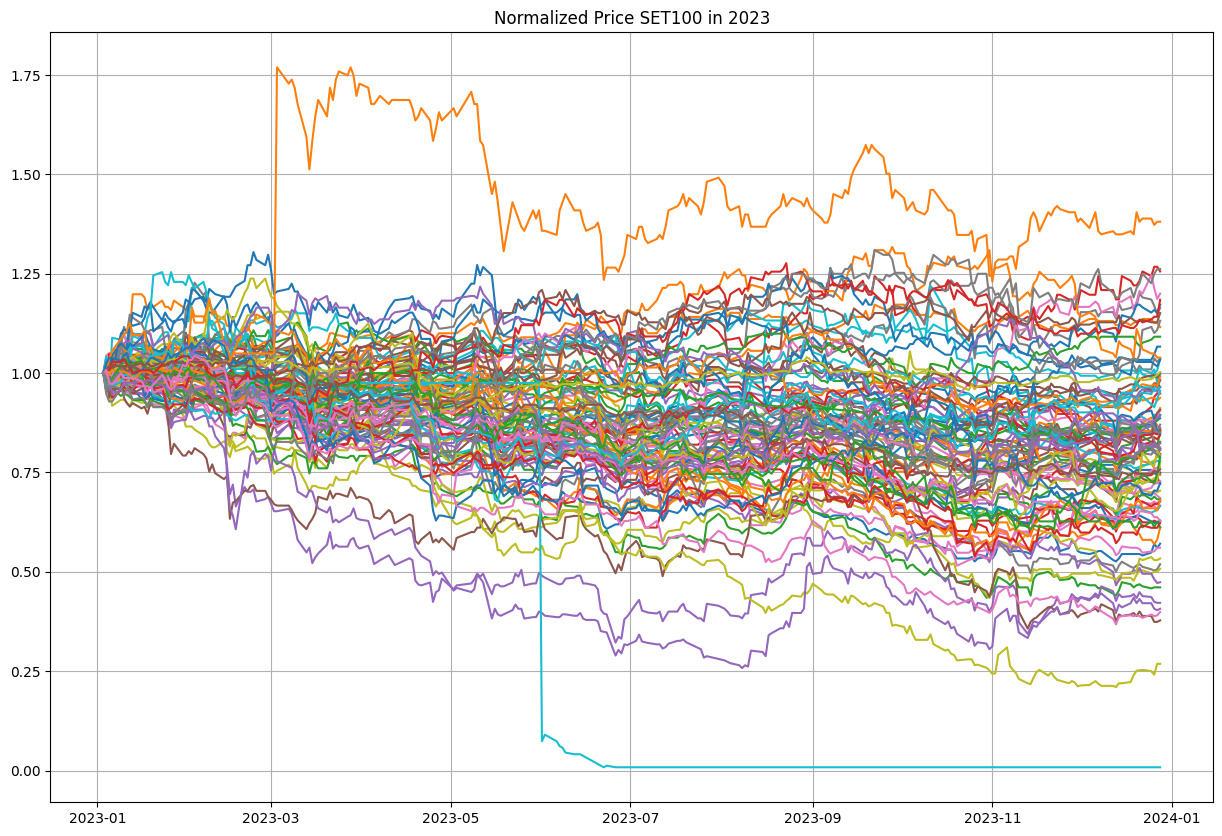

In [84]:
plt.figure(figsize=(15,10))
for sym in set100:
  data, dat_len = historical_prices[sym]
  norm_price = data/data.iloc[0]
  plt.plot(norm_price)
plt.grid()
plt.title("Normalized Price SET100 in 2023")

# Normalized Price Distance

In [85]:
import itertools
from statsmodels.tsa.stattools import coint
possible_pairs = []
for stock1, stock2 in itertools.combinations(set100, 2):
  dat1, len1 = historical_prices[stock1]
  dat2, len2 = historical_prices[stock2]
  if len1 == len2:
    norm1 = dat1/dat1.iloc[0]
    norm2 = dat2/dat1.iloc[0]
    npd = ((norm1 - norm2)**2).mean() # compute npd value
    possible_pairs.append((stock1, stock2, npd))  # append to list


In [86]:
sorted_pairs = sorted(possible_pairs, key=lambda apair: apair[2]) # sort by nlfd
sorted_pairs[:10] # show top 10 pairs

[('CPF', 'SPALI', 0.0012441019128475734),
 ('CPF', 'OR', 0.002203274318596161),
 ('BEM', 'LH', 0.0025149409766552617),
 ('KTC', 'SAWAD', 0.0025246307825182997),
 ('OR', 'SPALI', 0.0029257790797212113),
 ('CENTEL', 'SAWAD', 0.0032171466181889524),
 ('AOT', 'INTUCH', 0.0032711476909007783),
 ('CENTEL', 'GULF', 0.003273610339802829),
 ('GULF', 'KTC', 0.0034340883583307827),
 ('RCL', 'TVO', 0.0034975331012956083)]

## plot the Five pairs

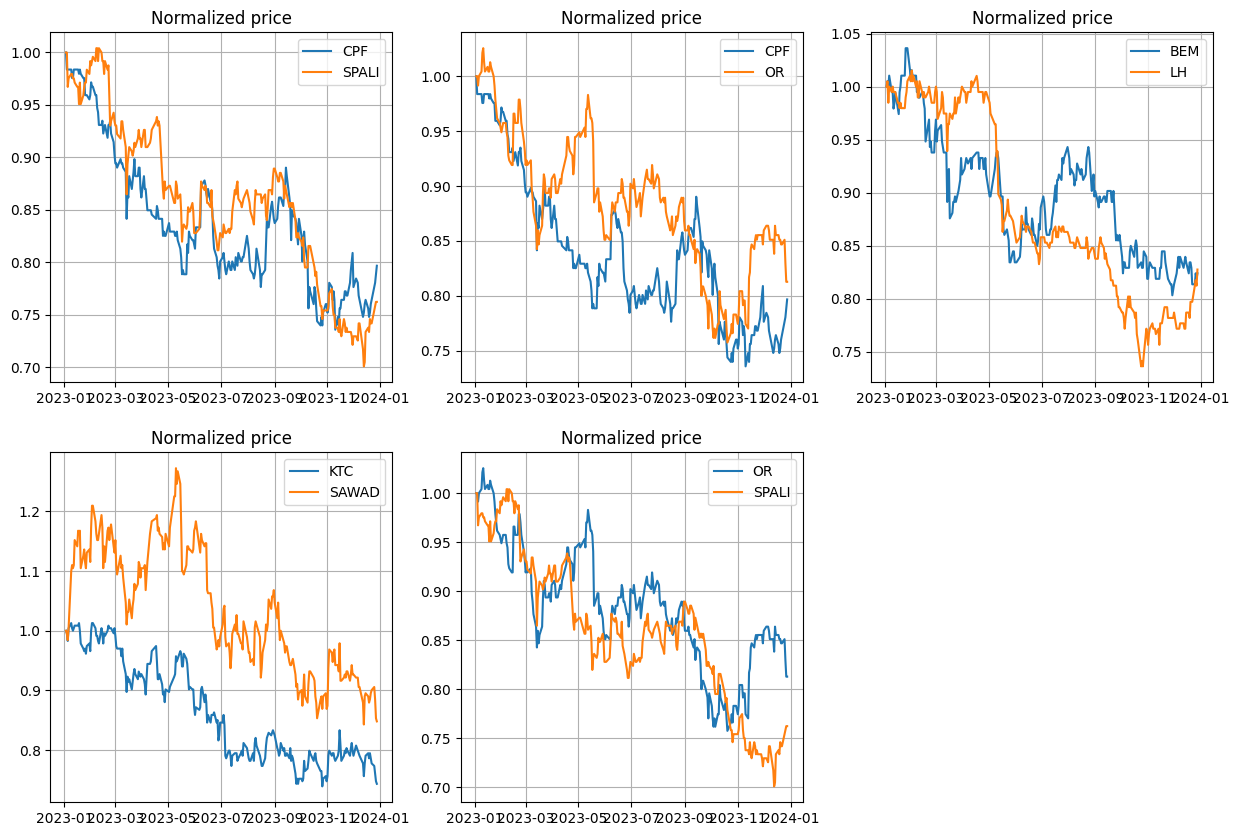

In [87]:
plt.figure(figsize=(15,10))
n = 5
for k in range(n):
  plt.subplot(2, 3, k +1)
  st1 = sorted_pairs[k][0]
  st2 = sorted_pairs[k][1]
  norm1 = historical_prices[st1][0]/historical_prices[st1][0].iloc[0]
  norm2 = historical_prices[st2][0]/historical_prices[st2][0].iloc[0]
  plt.plot(norm1, label=st1)
  plt.plot(norm2, label=st2)
  plt.legend()
  plt.title("Normalized price")
  plt.grid()


## Test for Cointegration

In [88]:
from sklearn.linear_model import LinearRegression  # build Linear Regression Line
from statsmodels.tsa.stattools import adfuller # ADF Test for statinary
def buildLinearRegression(y1, # output
                          y2): # input
  lin_model = LinearRegression() # initialize linear regression
  y = y1.values
  x = y2.values.reshape(-1,1) # always need to be nx1
  lin_model.fit(x, y)
  error = y - lin_model.predict(x)
  statistics,p_value,*_ = adfuller(error)  # is error stationary?
  # get only statistic and p-value ignore the rest
  return lin_model, statistics, p_value

In [89]:
sym1, sym2 = "CPF", "SPALI"
ticker1 = yf.Ticker(sym1 + ".BK")
prices1 = ticker1.history(start="2023-01-01", end="2023-12-31")
price1 = prices1['Close']
ticker2 = yf.Ticker(sym2 + ".BK")
prices2 = ticker2.history(start="2023-01-01", end="2023-12-31")
price2 = prices2['Close']
cpf_spali, stat1, pval1 = buildLinearRegression(price1, price2) # cpf = gamma1 * spali + e1 + mu1
spali_cpf, stat2, pval2 = buildLinearRegression(price2, price1) # spali = gamma2 * cpr + e2 + mu3
print("Model 1:")
print(f"  cpf = {cpf_spali.coef_[0]:0.2f} * spali + e1 + {cpf_spali.intercept_:0.2f}")
print(f"  p_val = {pval1:0.3f}")
print("Model 2:")
print(f"  splai = {spali_cpf.coef_[0]:0.2f} * cpf + e2 + {spali_cpf.intercept_:0.2f}")
print(f"  p_val = {pval2:0.3f}")

Model 1:
  cpf = 0.96 * spali + e1 + 1.12
  p_val = 0.027
Model 2:
  splai = 0.81 * cpf + e2 + 3.66
  p_val = 0.073


## Find cointegrated pair using cointegrated test

In [90]:
import itertools
from sklearn.linear_model import LinearRegression  # build Linear Regression Line
from statsmodels.tsa.stattools import adfuller # ADF Test for statinary
possible_pairs = {}
for stock1, stock2 in itertools.combinations(set100, 2):
  dat1, len1 = historical_prices[stock1]
  dat2, len2 = historical_prices[stock2]
  # data1 as a function of dat1
  model1, stat1, pval1 = buildLinearRegression(dat1, dat2) # dat1 = gamma1*dat2 + e1 + mu1
  model2, stat2, pval2 = buildLinearRegression(dat2, dat1) # dat2 = gamma2*dat1 + e2 + mu2
  if pval1 < pval2: # keep model 1
    possible_pairs[stock1, stock2] = [model1, pval1]
  else: # keep model 2
    possible_pairs[stock2, stock1] = [model2, pval2]

In [91]:
sorted_pairs =  sorted(possible_pairs.items(), key=lambda apair: apair[1][1])
sorted_pairs = {k: v for k, v in sorted_pairs}

In [92]:
for k, v in sorted_pairs.items():
  print(f"{k}: p_val: {v[1]}")

('KTC', 'WHA'): p_val: 2.9246967429666297e-06
('ADVANC', 'KTC'): p_val: 8.5771480039258e-06
('BDMS', 'SUPER'): p_val: 1.140403444926434e-05
('ADVANC', 'EGCO'): p_val: 1.461308661662527e-05
('AWC', 'PTG'): p_val: 1.5955033073288546e-05
('RS', 'CPALL'): p_val: 1.6727188565196644e-05
('EA', 'THANI'): p_val: 2.369316874874472e-05
('ADVANC', 'MAJOR'): p_val: 2.7612595110929017e-05
('ADVANC', 'PTTGC'): p_val: 3.0663343785996796e-05
('KBANK', 'ADVANC'): p_val: 3.0920553648620095e-05
('ADVANC', 'STGT'): p_val: 3.5555641993228104e-05
('CPALL', 'BEC'): p_val: 4.54007975784722e-05
('IVL', 'TVO'): p_val: 4.9964239941596924e-05
('CRC', 'QH'): p_val: 6.125138289920282e-05
('HMPRO', 'BGRIM'): p_val: 6.130376582735924e-05
('MEGA', 'TQM'): p_val: 6.590014901013977e-05
('CPF', 'SYNEX'): p_val: 6.605927957595471e-05
('ADVANC', 'STA'): p_val: 7.311770625320068e-05
('INTUCH', 'BGRIM'): p_val: 8.304039603072014e-05
('ADVANC', 'CKP'): p_val: 0.0001171656341681353
('SAWAD', 'SUPER'): p_val: 0.0001177274137664

In [93]:
best_model, p_val = sorted_pairs['KTC', 'WHA']
print(f"KTC = {best_model.coef_[0]:0.2f} * WHA + {best_model.intercept_:0.3f}")

KTC = -9.20 * WHA + 93.367


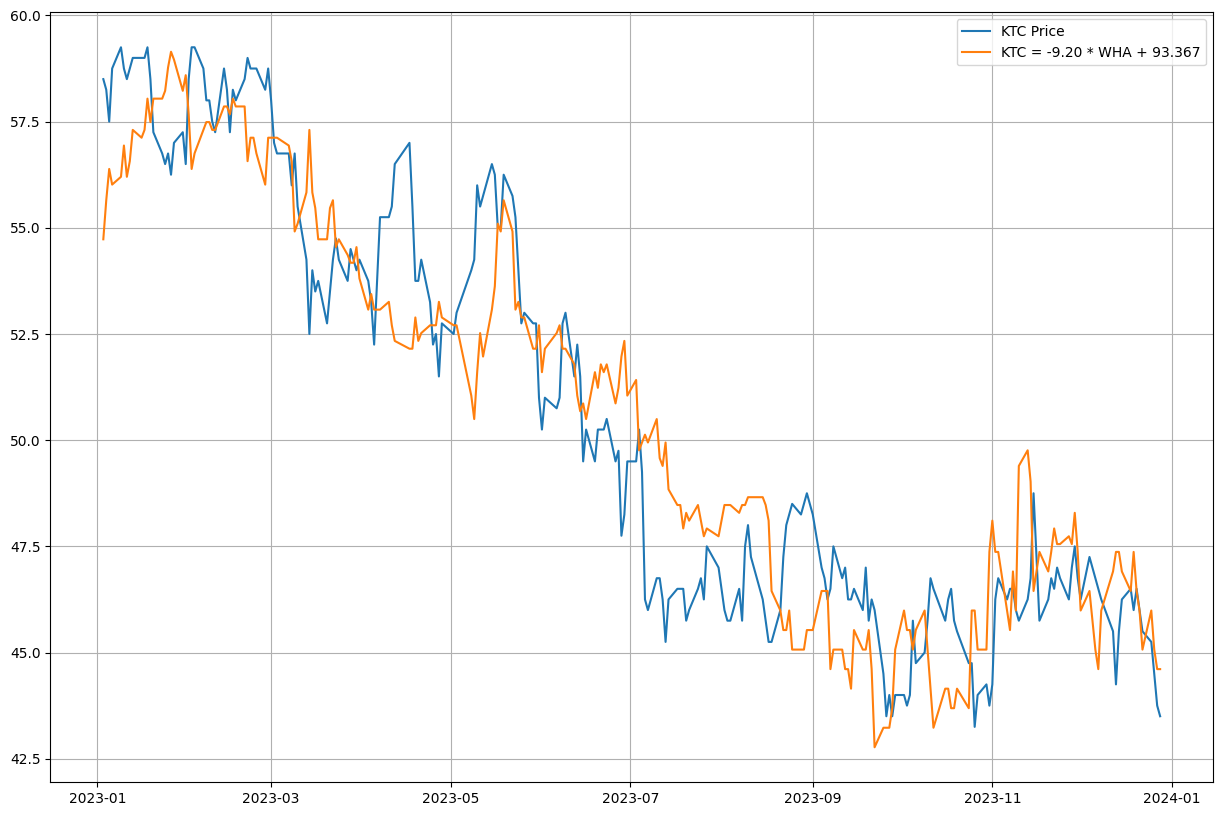

In [94]:
p1,_ = historical_prices["KTC"]
p2,_ = historical_prices["WHA"]
p1_hat = best_model.predict(p2.values.reshape(-1,1))
p1_hat = pd.Series(data=p1_hat, index=p1.index)
error = p1 - p1_hat
plt.figure(figsize=(15,10))
plt.plot(p1, label="KTC Price")
plt.plot(p1_hat, label =f"KTC = {best_model.coef_[0]:0.2f} * WHA + {best_model.intercept_:0.3f}")
plt.grid()
plt.legend()


Text(0.5, 1.0, 'p1 - p1_hat')

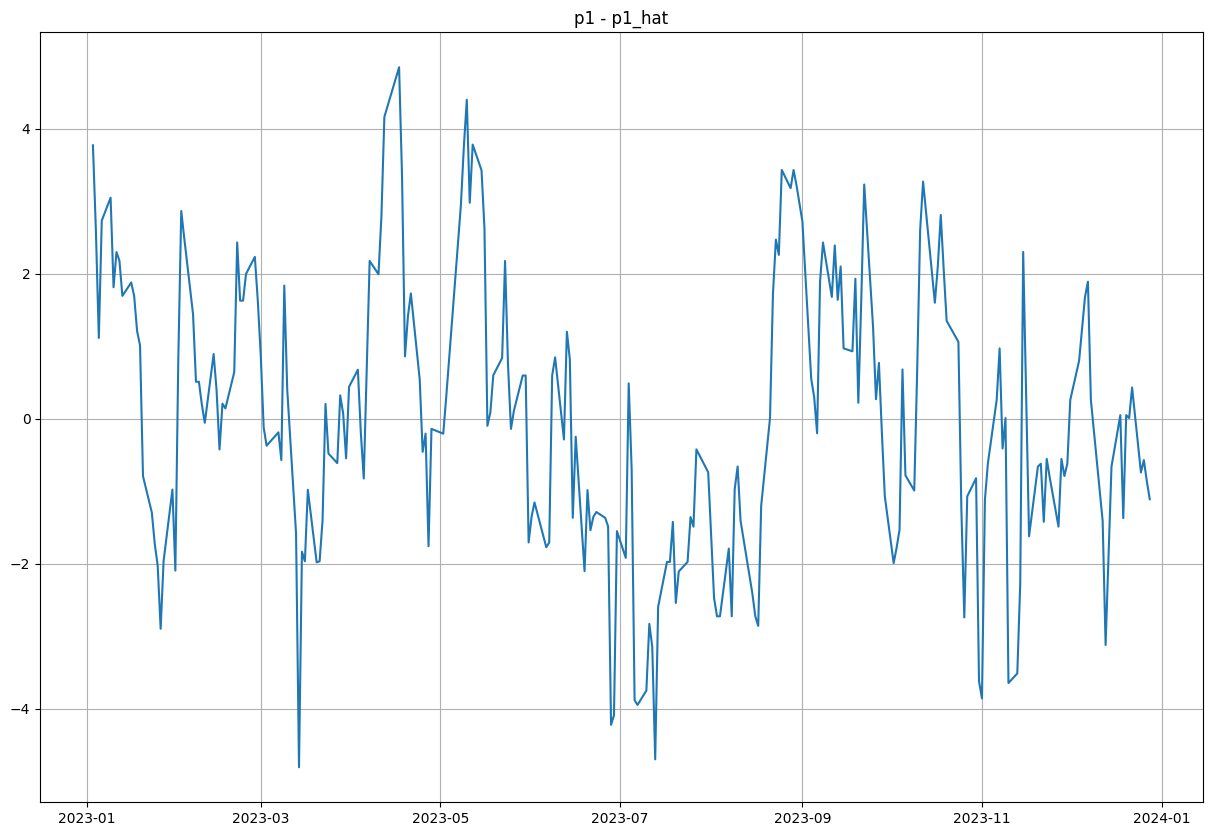

In [95]:
plt.figure(figsize=(15,10))
plt.plot(p1 - p1_hat)
plt.grid()
plt.title("p1 - p1_hat")

('EPG', 'EA'): p_val: 0.9278291538112098

In [96]:
worse_model, p_val = sorted_pairs['EPG', 'EA']
print(f"EPG = {worse_model.coef_[0]:0.2f} * EA + {worse_model.intercept_:0.3f}")

EPG = 0.05 * EA + 4.541


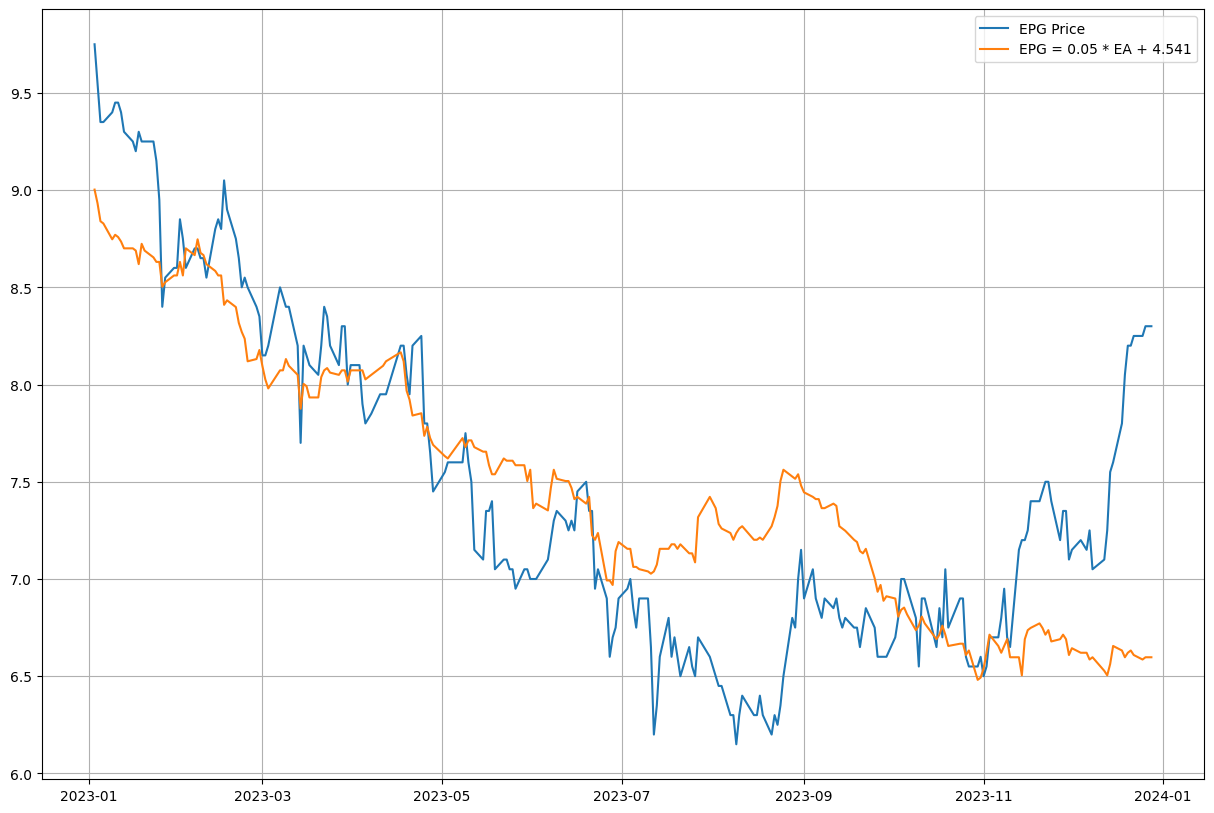

In [97]:
p1,_ = historical_prices["EPG"]
p2,_ = historical_prices["EA"]
p1_hat = worse_model.predict(p2.values.reshape(-1,1))
p1_hat = pd.Series(data=p1_hat, index=p1.index)
error = p1 - p1_hat
plt.figure(figsize=(15,10))
plt.plot(p1, label="EPG Price")
plt.plot(p1_hat, label =f"EPG = {worse_model.coef_[0]:0.2f} * EA + {worse_model.intercept_:0.3f}")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'p1 - p1_hat')

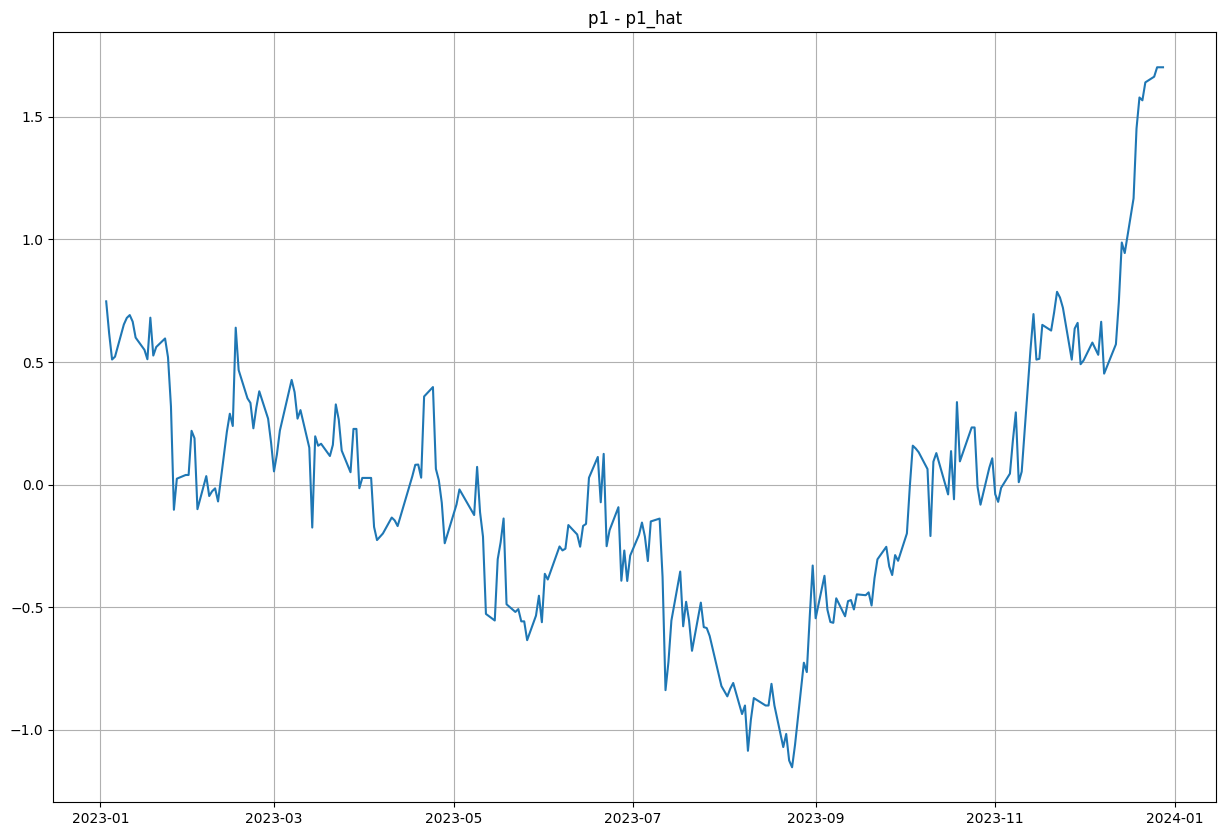

In [98]:
plt.figure(figsize=(15,10))
plt.plot(p1 - p1_hat)
plt.grid()
plt.title("p1 - p1_hat")

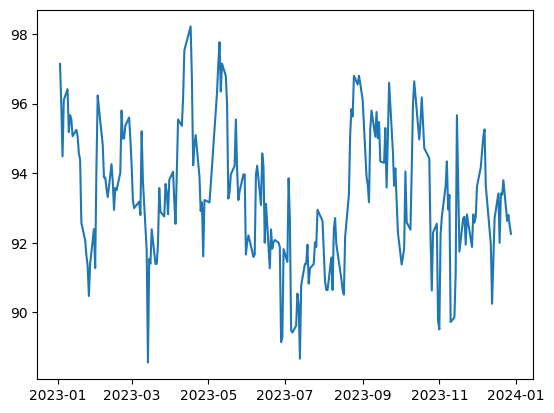

In [100]:
plt.plot(historical_prices["KTC"][0]+ historical_prices["WHA"][0]*9.2)

## Trade simulation

In [146]:
p1 = yf.download("KTC.BK", "2024-01-01", "2024-12-31").Close # KTC Price
p2 = yf.download("WHA.BK", "2024-01-01", "2024-12-31").Close # WHA Price
p1_hat = best_model.predict(p2.values.reshape(-1,1)) # make p1_hat
gamma = best_model.coef_[0]
p1_hat = pd.Series(data=p1_hat, index=p1.index)
error = p1 - p1_hat  # error term
cash = 100_000 # initalize wealth
wealth = [cash]
shares1 = [0]
shares2 = [0]
th_short = 3
th_long = -th_short
th_close = 0
position = None
num_long = 0
num_short = 0
cur_wealth = sh1 = sh2  = 0

for date in error.index:
  #print(position, cash, cur_wealth, sh1, sh2, p1[date], p2[date])
  if (error[date] > th_short) and (position != "SHORT"): # take short position in spreads
    # sell all share first
    cash += shares1[-1] * p1[date] + shares2[-1] * p2[date]
    total_val  = p1[date] + np.abs(gamma) * p2[date]
    C = cash / total_val
    sh1 = -C
    sh2 = gamma * C
    cash += C * total_val
    position = "SHORT"
    num_short += 1
  elif (error[date]< th_long ) and (position != "LONG"): # take long position in spread
    # close short if not
    cash += shares1[-1] * p1[date] + shares2[-1] * p2[date]
    total_val  = p1[date] + np.abs(gamma)  * p2[date]
    C = cash / total_val
    sh1 = C
    sh2 = -gamma * C
    cash -= C * total_val
    position = "LONG"
    num_long += 1
  elif (error[date] < th_close) and (position == "SHORT"): # close short position
    cash += shares1[-1] * p1[date] + shares2[-1] * p2[date]
    sh1 = 0
    sh2 = 0
    position = None
  elif (error[date] > th_close) and (position == "LONG"): # close long position
    cash += shares1[-1] * p1[date] + shares2[-1] * p2[date]
    sh1 = 0
    sh2 = 0
    position = None
  else:
    pass
  cur_wealth = cash + sh1 * p1[date] + sh2 * p2[date]
  wealth.append(cur_wealth)
  shares1.append(sh1)
  shares2.append(sh2)
  print(position, cash, cur_wealth, sh1, sh2, p1[date], p2[date])
wealth = pd.Series(data=wealth[:-1], index=p1.index)
shares1 = pd.Series(data=shares1[:-1], index=p1.index)
shares2 = pd.Series(data=shares2[:-1], index=p1.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

None 100000 100000.0 0 0 44.5 5.099999904632568
None 100000 100000.0 0 0 44.5 5.099999904632568
None 100000 100000.0 0 0 44.5 5.150000095367432
LONG 0.0 100000.00000000003 1115.6959283394424 10263.987653533164 44.0 4.960000038146973
LONG 0.0 100352.5684068691 1115.6959283394424 10263.987653533164 44.5 4.940000057220459
LONG 0.0 100352.5684068691 1115.6959283394424 10263.987653533164 44.5 4.940000057220459
LONG 0.0 100073.64442478424 1115.6959283394424 10263.987653533164 44.25 4.940000057220459
LONG 0.0 98710.33194846402 1115.6959283394424 10263.987653533164 44.5 4.78000020980835
LONG 0.0 99047.24663828107 1115.6959283394424 10263.987653533164 44.25 4.840000152587891
LONG 0.0 98284.1191168107 1115.6959283394424 10263.987653533164 43.75 4.820000171661377
LONG 0.0 94220.86006722745 1115.6959283394424 10263.987653533164 42.5 4.559999942779541
LONG 0.0 95805.10581790033 1115.6959283394424 10263.987653533164 43.0 4.659999847412109
LONG 0.0 95599.82626059972 1115.6959283394424 10263.987653533

Text(0.5, 1.0, 'return (%) Threshold = 3.000, N: 1')

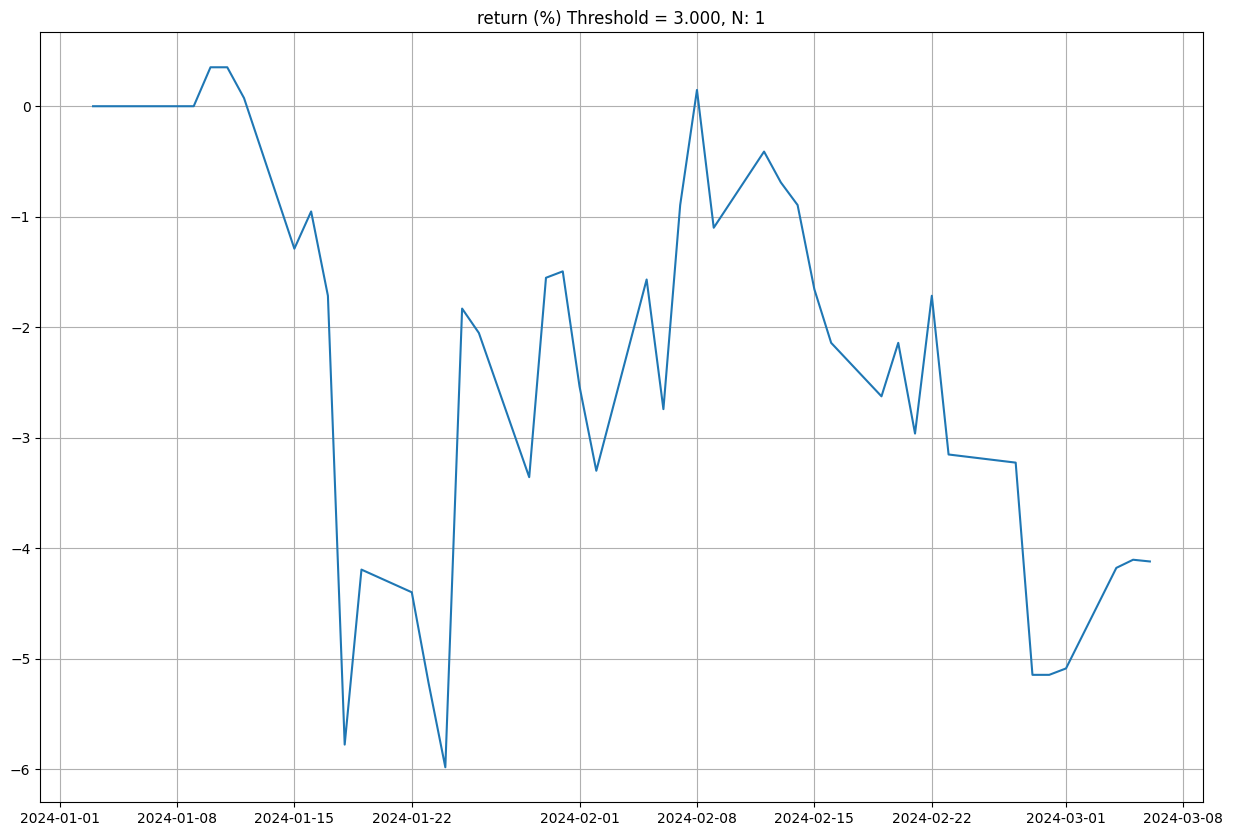

Text(0.5, 1.0, 'return (%) Threshold = 3.000, N: 1')

In [147]:
plt.figure(figsize=(15,10))
plt.plot((wealth/ wealth.iloc[0] - 1) *100)
plt.grid()
plt.title(f"return (%) Threshold = {th_short:0.3f}, N: {num_long + num_short}")


Text(0.5, 1.0, 'Position on WHA')

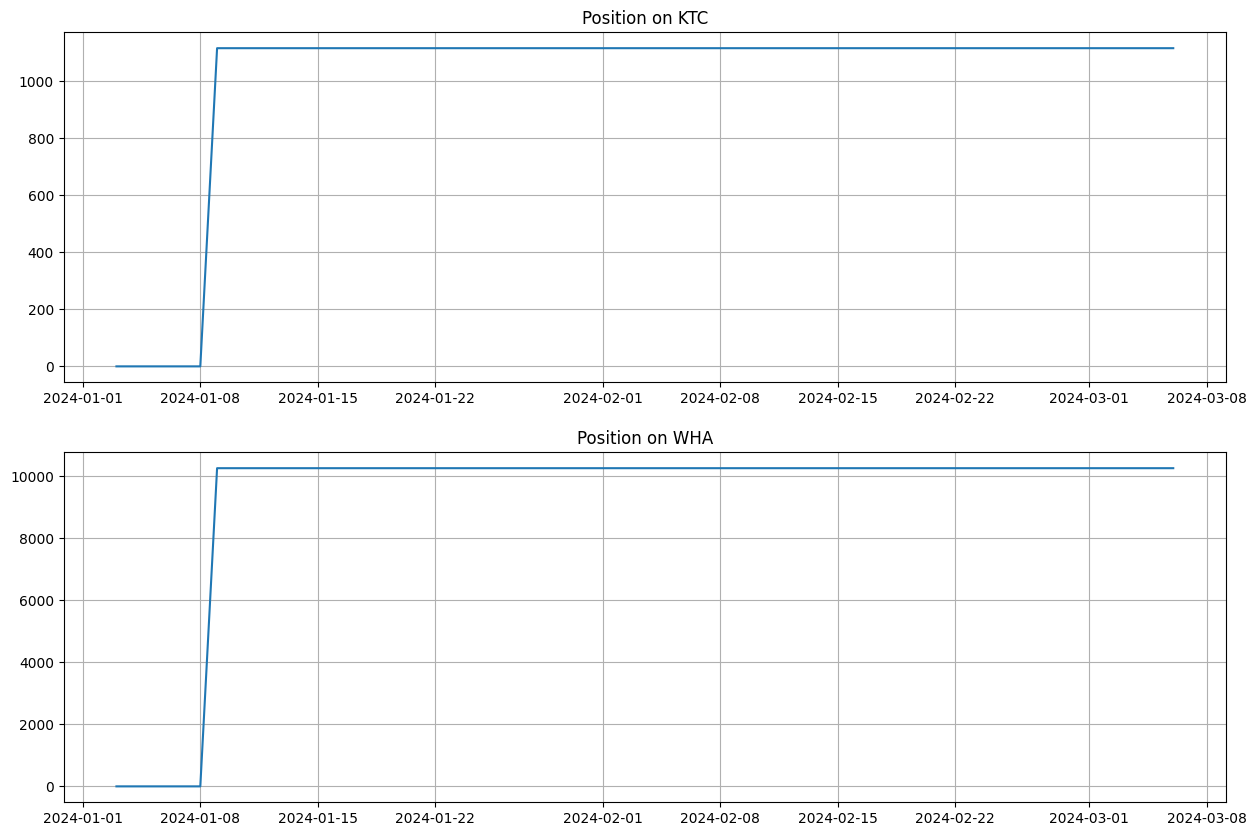

In [149]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(shares1)

plt.grid()
plt.title("Position on KTC")
plt.subplot(2,1,2)
plt.plot(shares2)
plt.grid()
plt.title("Position on WHA")

In [104]:
sigma_z = error.std()
print(sigma_z)

1.922573837402224


In [109]:
from scipy.stats import norm
N = 10
T = len(p1)
NT = N/T
z = norm.ppf(1-NT)
s0 = sigma_z * z
print(f"N: {N}, T: {T}, N/T: {NT:0.3f}, z: {z:0.3f}, s0: {s0:0.3f}")

N: 10, T: 243, N/T: 0.041, z: 1.737, s0: 3.340
